<a href="https://colab.research.google.com/github/mahima-c/DL-course/blob/main/vanillaGAN_using_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [6]:
# step-1:create real data for discrimator
train_data_length=1024
train_data=torch.zeros((train_data_length,2))
train_data[:,0]=2*math.pi*(torch.rand(train_data_length))
train_data[:,1]=torch.sin(train_data[:,0])
train_labels=torch.zeros(train_data_length)#-----anyclass you can give but same
train_set=[
           (train_data[i],train_labels[i]) for i in range(train_data_length)
]

In [7]:
train_set

[(tensor([0.3626, 0.3547]), tensor(0.)),
 (tensor([2.3970, 0.6777]), tensor(0.)),
 (tensor([ 6.1773, -0.1057]), tensor(0.)),
 (tensor([ 6.0489, -0.2322]), tensor(0.)),
 (tensor([0.8552, 0.7547]), tensor(0.)),
 (tensor([ 3.6105, -0.4519]), tensor(0.)),
 (tensor([ 4.7859, -0.9973]), tensor(0.)),
 (tensor([2.2317, 0.7894]), tensor(0.)),
 (tensor([0.8736, 0.7666]), tensor(0.)),
 (tensor([ 4.0633, -0.7966]), tensor(0.)),
 (tensor([0.4114, 0.3999]), tensor(0.)),
 (tensor([ 4.6117, -0.9949]), tensor(0.)),
 (tensor([1.6774, 0.9943]), tensor(0.)),
 (tensor([ 5.4554, -0.7364]), tensor(0.)),
 (tensor([0.7740, 0.6990]), tensor(0.)),
 (tensor([ 3.9402, -0.7164]), tensor(0.)),
 (tensor([1.8043, 0.9729]), tensor(0.)),
 (tensor([1.6321, 0.9981]), tensor(0.)),
 (tensor([1.7845, 0.9772]), tensor(0.)),
 (tensor([ 3.3756, -0.2319]), tensor(0.)),
 (tensor([ 3.6808, -0.5134]), tensor(0.)),
 (tensor([1.8480, 0.9618]), tensor(0.)),
 (tensor([1.9314, 0.9357]), tensor(0.)),
 (tensor([2.2456, 0.7809]), tensor(0.

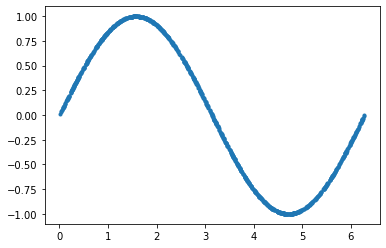

In [8]:
plt.plot(train_data[:,0],train_data[:,1],".")

In [9]:
# load the training data as batch
batch_size=32
train_loader=torch.utils.data.DataLoader(
    train_set,batch_size,shuffle=True
)

In [13]:
# step-2:create discriminator neural network
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
            nn.Linear(2, 556),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(556, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

  def forward(self,x):
     output=self.model(x)
     return output     


In [15]:
discriminator=Discriminator()
discriminator

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=556, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=556, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=128, out_features=64, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [16]:
# step-3:create genrator neural network
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

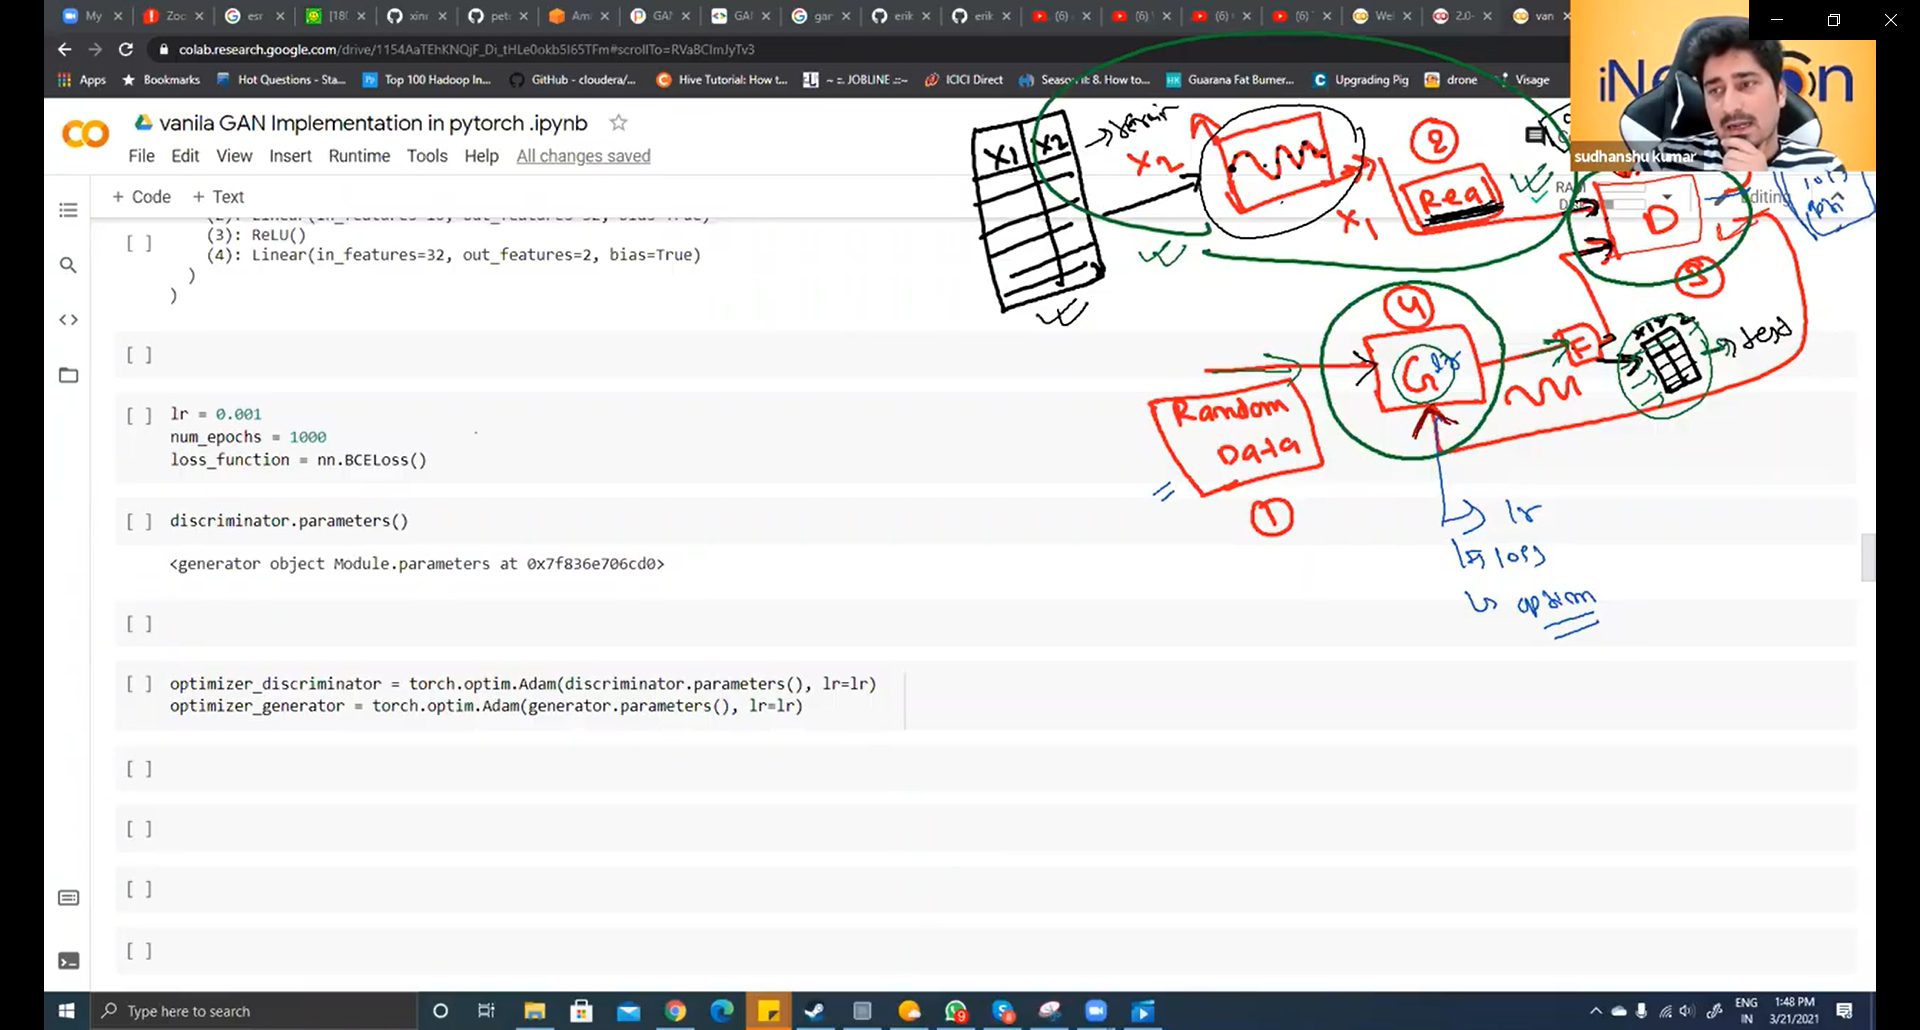

In [17]:
lr = 0.001
num_epochs = 300
loss_function =  #binary cross entropy loss

In [18]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [19]:
# step-4:connect network
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.24998918175697327
Epoch: 0 Loss G.: 3.106135845184326
Epoch: 10 Loss D.: 0.5806214809417725
Epoch: 10 Loss G.: 1.0777512788772583
Epoch: 20 Loss D.: 0.8070558905601501
Epoch: 20 Loss G.: 0.6660587787628174
Epoch: 30 Loss D.: 0.7421430349349976
Epoch: 30 Loss G.: 0.7866283655166626
Epoch: 40 Loss D.: 0.681287407875061
Epoch: 40 Loss G.: 0.7524725198745728
Epoch: 50 Loss D.: 0.6501119136810303
Epoch: 50 Loss G.: 0.7034260034561157
Epoch: 60 Loss D.: 0.7826018333435059
Epoch: 60 Loss G.: 0.7263917922973633
Epoch: 70 Loss D.: 0.6911325454711914
Epoch: 70 Loss G.: 0.6676295399665833
Epoch: 80 Loss D.: 0.6730135679244995
Epoch: 80 Loss G.: 0.7930200099945068
Epoch: 90 Loss D.: 0.738156795501709
Epoch: 90 Loss G.: 0.589192271232605
Epoch: 100 Loss D.: 0.6986120343208313
Epoch: 100 Loss G.: 0.7459762096405029
Epoch: 110 Loss D.: 0.6792072653770447
Epoch: 110 Loss G.: 0.6449700593948364
Epoch: 120 Loss D.: 0.6912601590156555
Epoch: 120 Loss G.: 0.6914888024330139
Epoch: 130 

In [20]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

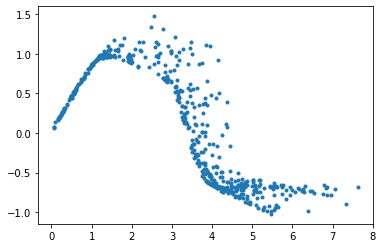

In [21]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

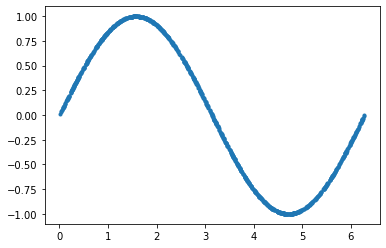

In [22]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [23]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [24]:
torch.manual_seed(111)

In [25]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [26]:
device

device(type='cpu')